# **Titanic Survival Prediction**

**Import essential libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

**Set visualization style**

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

**Load the datasets**

In [3]:
df = pd.read_csv('/kaggle/input/test-file/tested.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset shape: (418, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


**Initial Data Exploration**

In [4]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Dataset information
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# Basic statistics
print("\nStatistical Summary:")
display(df.describe(include='all'))


Statistical Summary:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Peter, Master. Michael J",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


**Data Cleaning & Preprocessing**

In [8]:
# Create a copy for cleaning
df_clean = df.copy()

In [9]:
# Check exact missing values
print("Missing values before cleaning:")
print(df_clean.isnull().sum())

Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
# Strategy for missing values
# Age: Fill with median based on Pclass and Sex
df_clean['Age'] = df_clean.groupby(['Pclass', 'Sex'])['Age'].transform(
    lambda x: x.fillna(x.median())
)

In [11]:
# Cabin: Extract deck information if available, then fill missing
df_clean['Deck'] = df_clean['Cabin'].str[0] if 'Cabin' in df_clean.columns else None
df_clean['Deck'] = df_clean['Deck'].fillna('Unknown')

In [12]:
df_clean.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Deck             0
dtype: int64

In [13]:
# Fare: Fill single missing values with median of Pclass
df_clean['Fare'] = df_clean.groupby('Pclass')['Fare'].transform(
    lambda x: x.fillna(x.median())
)

In [14]:
df_clean.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Deck             0
dtype: int64

In [15]:
# Drop Cabin column because we have too many missing values
if df_clean['Cabin'].isnull().sum() / len(df_clean) > 0.7:
    df_clean = df_clean.drop('Cabin', axis=1)

In [16]:
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64


**Feature Engineering**

In [17]:
# Create new features that might be predictive
# Family size
df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1

In [18]:
# Is alone
df_clean['IsAlone'] = (df_clean['FamilySize'] == 1).astype(int)

In [19]:
# Age groups
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], 
                              bins=[0, 12, 18, 35, 60, 100],
                              labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

In [20]:
# Title extraction from Name
df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_counts = df_clean['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
df_clean['Title'] = df_clean['Title'].replace(rare_titles, 'Rare')

In [21]:
# Fare per person
df_clean['FarePerPerson'] = df_clean['Fare'] / df_clean['FamilySize']

print("New features created: FamilySize, IsAlone, AgeGroup, Title, FarePerPerson")
display(df_clean.head())

New features created: FamilySize, IsAlone, AgeGroup, Title, FarePerPerson


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,FamilySize,IsAlone,AgeGroup,Title,FarePerPerson
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Unknown,1,1,Young Adult,Mr,7.829200
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Unknown,2,0,Adult,Mrs,3.500000
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Unknown,1,1,Senior,Mr,9.687500
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Unknown,1,1,Young Adult,Mr,8.662500
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Unknown,3,0,Young Adult,Mrs,4.095833


**Data Type Conversion & Encoding**

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    418 non-null    int64   
 1   Survived       418 non-null    int64   
 2   Pclass         418 non-null    int64   
 3   Name           418 non-null    object  
 4   Sex            418 non-null    object  
 5   Age            418 non-null    float64 
 6   SibSp          418 non-null    int64   
 7   Parch          418 non-null    int64   
 8   Ticket         418 non-null    object  
 9   Fare           418 non-null    float64 
 10  Embarked       418 non-null    object  
 11  Deck           418 non-null    object  
 12  FamilySize     418 non-null    int64   
 13  IsAlone        418 non-null    int64   
 14  AgeGroup       418 non-null    category
 15  Title          418 non-null    object  
 16  FarePerPerson  418 non-null    float64 
dtypes: category(1), float64(3), int64(7

In [23]:
# Encode categorical variables
categorical_cols = ['Sex', 'Embarked', 'Title', 'AgeGroup', 'Deck']
label_encoders = {}

for col in categorical_cols:
    if col in df_clean.columns:
        le = LabelEncoder()
        df_clean[col + '_Encoded'] = le.fit_transform(df_clean[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Encoded Sex: {'female': np.int64(0), 'male': np.int64(1)}
Encoded Embarked: {'C': np.int64(0), 'Q': np.int64(1), 'S': np.int64(2)}
Encoded Title: {'Master': np.int64(0), 'Miss': np.int64(1), 'Mr': np.int64(2), 'Mrs': np.int64(3), 'Rare': np.int64(4)}
Encoded AgeGroup: {'Adult': np.int64(0), 'Child': np.int64(1), 'Senior': np.int64(2), 'Teen': np.int64(3), 'Young Adult': np.int64(4)}
Encoded Deck: {'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2), 'D': np.int64(3), 'E': np.int64(4), 'F': np.int64(5), 'G': np.int64(6), 'Unknown': np.int64(7)}


In [24]:
display(df_clean.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,IsAlone,AgeGroup,Title,FarePerPerson,Sex_Encoded,Embarked_Encoded,Title_Encoded,AgeGroup_Encoded,Deck_Encoded
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,...,1,1,Young Adult,Mr,7.829200,1,1,2,4,7
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,...,2,0,Adult,Mrs,3.500000,0,2,3,0,7
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,...,1,1,Senior,Mr,9.687500,1,1,2,2,7
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,...,1,1,Young Adult,Mr,8.662500,1,2,2,4,7
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,...,3,0,Young Adult,Mrs,4.095833,0,2,3,4,7


In [25]:
# Select final features for modeling
features_to_keep = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 
                    'FamilySize', 'IsAlone', 'FarePerPerson'] + \
                   [col + '_Encoded' for col in categorical_cols if col in df_clean.columns]

In [26]:
# Remove any remaining missing values
df_clean = df_clean.dropna(subset=features_to_keep + ['Survived'])
print(f"\nFinal dataset shape: {df_clean.shape}")


Final dataset shape: (418, 22)


**Exploratory Data Analysis (EDA)**

* Target Variable Distribution

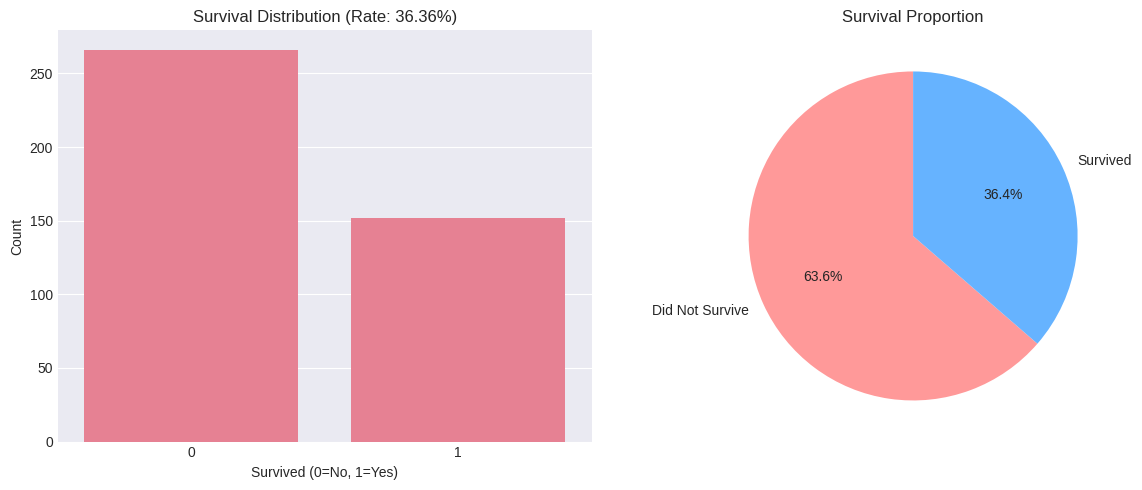

In [27]:
# Survival rate overall
survival_rate = df_clean['Survived'].mean()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
sns.countplot(x='Survived', data=df_clean, ax=axes[0])
axes[0].set_title(f'Survival Distribution (Rate: {survival_rate:.2%})')
axes[0].set_xlabel('Survived (0=No, 1=Yes)')
axes[0].set_ylabel('Count')

# Pie chart
survival_counts = df_clean['Survived'].value_counts()
axes[1].pie(survival_counts, labels=['Did Not Survive', 'Survived'], 
            autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[1].set_title('Survival Proportion')
plt.tight_layout()
plt.show()

* Categorical Feature Analysis

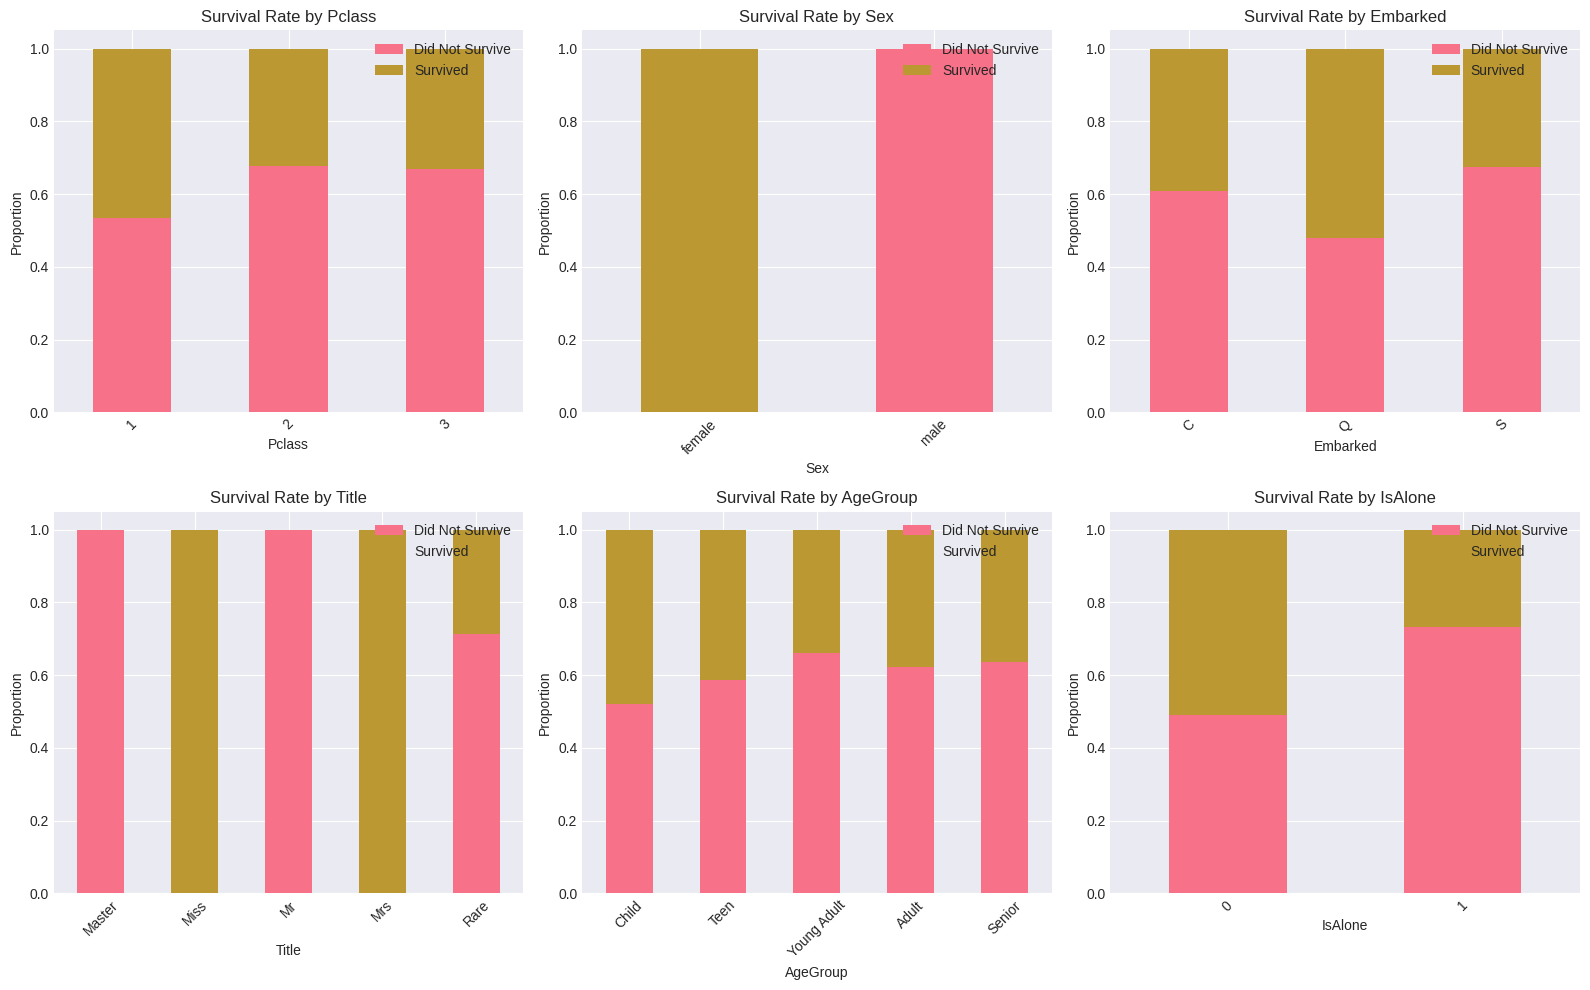

Key Insights from Categorical Features:

Pclass:
  1: 46.73% survival
  3: 33.03% survival
  2: 32.26% survival

Sex:
  female: 100.00% survival
  male: 0.00% survival

Embarked:
  Q: 52.17% survival
  C: 39.22% survival
  S: 32.59% survival

Title:
  Miss: 100.00% survival
  Mrs: 100.00% survival
  Rare: 28.57% survival
  Master: 0.00% survival
  Mr: 0.00% survival

AgeGroup:
  Child: 48.00% survival
  Teen: 41.38% survival
  Adult: 37.86% survival
  Senior: 36.36% survival
  Young Adult: 34.00% survival

IsAlone:
  0: 50.91% survival
  1: 26.88% survival


In [28]:
# Analyze survival by key categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'AgeGroup', 'IsAlone']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    if feature in df_clean.columns:
        # Create cross-tabulation
        crosstab = pd.crosstab(df_clean[feature], df_clean['Survived'], normalize='index')
        
        # Plot
        crosstab.plot(kind='bar', ax=axes[idx], stacked=True)
        axes[idx].set_title(f'Survival Rate by {feature}')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Proportion')
        axes[idx].legend(['Did Not Survive', 'Survived'])
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Key findings table
print("Key Insights from Categorical Features:")
for feature in categorical_features:
    if feature in df_clean.columns:
        survival_by_feature = df_clean.groupby(feature)['Survived'].mean().sort_values(ascending=False)
        print(f"\n{feature}:")
        for value, rate in survival_by_feature.items():
            print(f"  {value}: {rate:.2%} survival")

* Numerical Feature Analysis

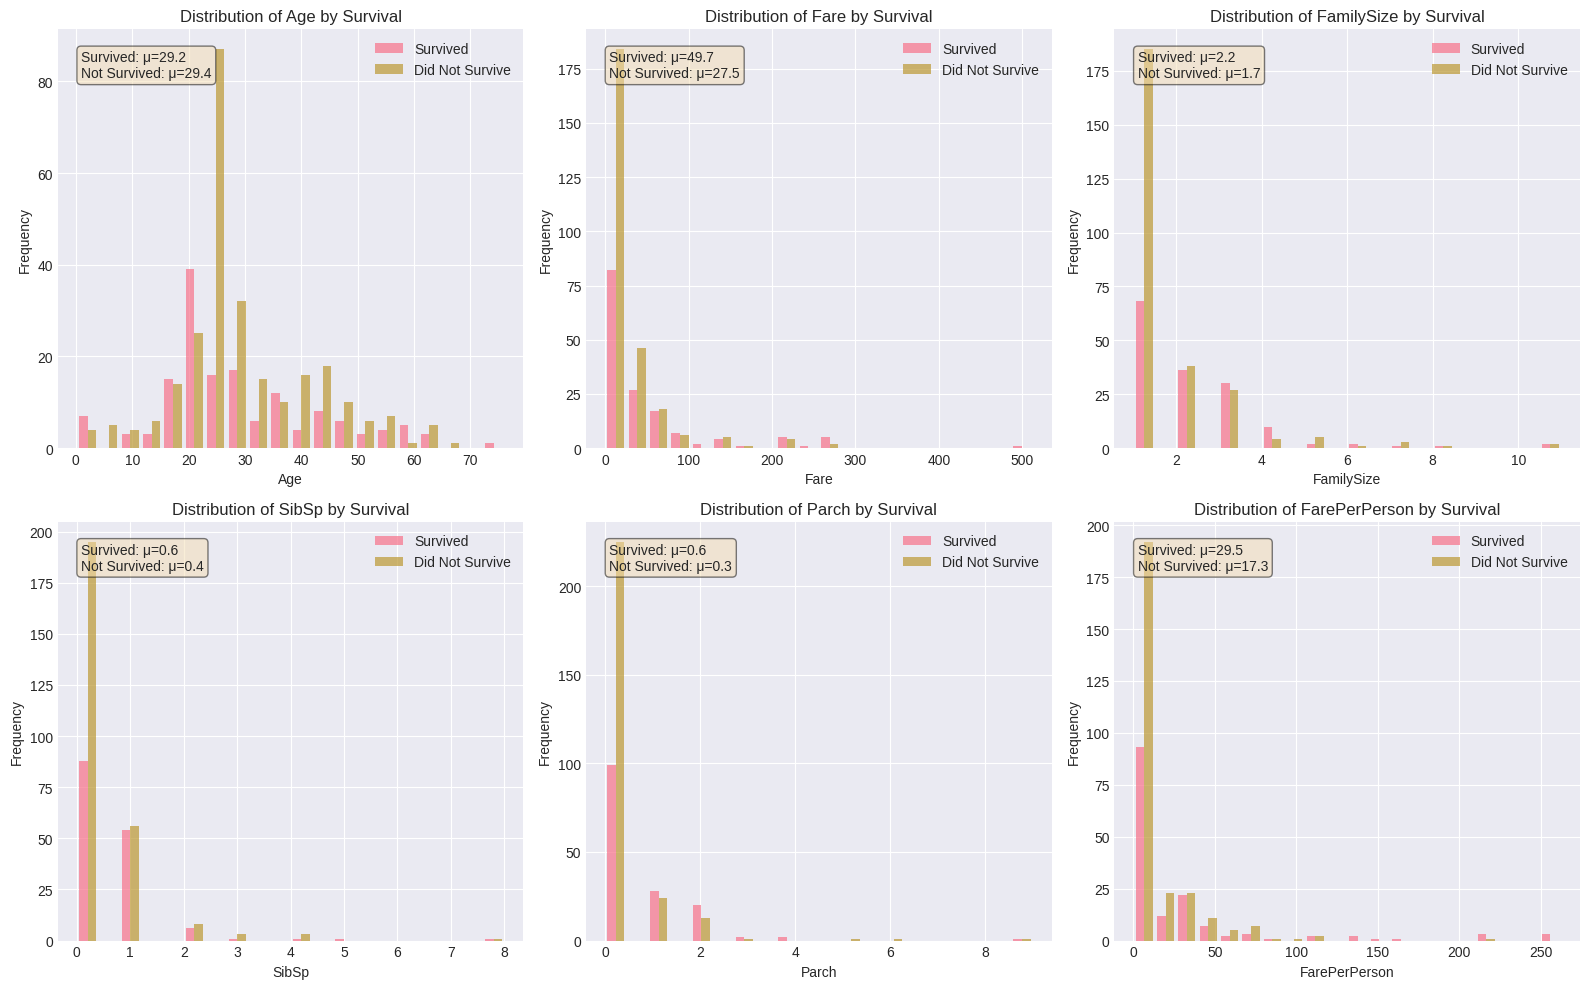

In [29]:
# Distribution of numerical features by survival
numerical_features = ['Age', 'Fare', 'FamilySize', 'SibSp', 'Parch', 'FarePerPerson']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    if feature in df_clean.columns:
        # Create separate distributions for survived/not survived
        survived = df_clean[df_clean['Survived'] == 1][feature]
        not_survived = df_clean[df_clean['Survived'] == 0][feature]
        
        # Plot histograms
        axes[idx].hist([survived, not_survived], bins=20, 
                       label=['Survived', 'Did Not Survive'], 
                       alpha=0.7, stacked=False)
        axes[idx].set_title(f'Distribution of {feature} by Survival')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')
        axes[idx].legend()
        
        # Add statistical summary
        axes[idx].text(0.05, 0.95, 
                      f"Survived: μ={survived.mean():.1f}\nNot Survived: μ={not_survived.mean():.1f}",
                      transform=axes[idx].transAxes,
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

* Correlation Analysis

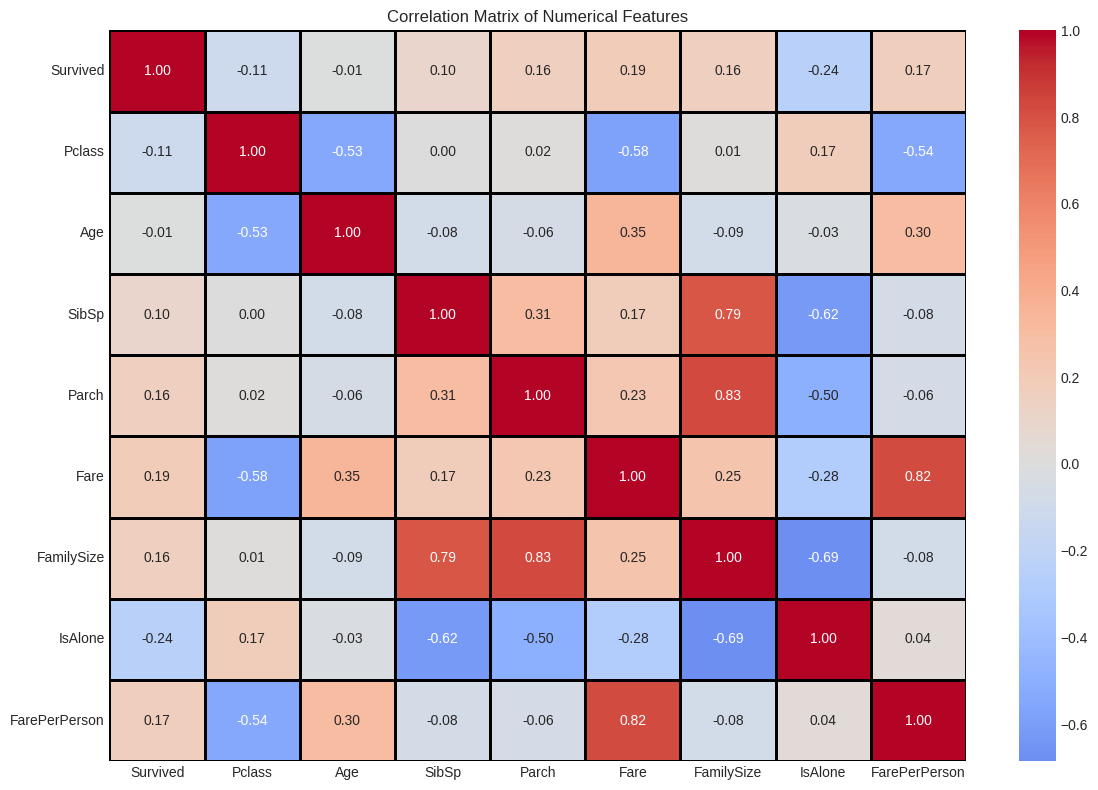

Top Correlations with Survival:
Fare: 0.192
FarePerPerson: 0.165
FamilySize: 0.162
Parch: 0.159
SibSp: 0.100
Age: -0.007
Pclass: -0.109
IsAlone: -0.244


In [30]:
# Select numerical columns for correlation
numerical_cols_for_corr = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 
                           'FamilySize', 'IsAlone', 'FarePerPerson']

# Calculate correlation matrix
correlation_matrix = df_clean[numerical_cols_for_corr].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            center=0, linewidths=1, linecolor='black', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Top correlations with survival
survival_corr = correlation_matrix['Survived'].sort_values(ascending=False)
print("Top Correlations with Survival:")
for feature, corr_value in survival_corr.items():
    if feature != 'Survived':
        print(f"{feature}: {corr_value:.3f}")